In [31]:
import numpy as np
import random
from scipy.optimize import minimize
import math
import matplotlib.pyplot as plt

In [32]:
#well connector price per m2
#pipe price per m2
p_well=3
p_pipe=1

In [179]:
#so far random number generator
#position of the troll
#position of the well
random.seed(10)
#pos_well=(random.random(),random.random())
pos_troll=(random.random()*10,random.random()*random.randint(1,100))


In [189]:
#simulate wells locations and random initial placement of the drilling centers
random.seed(20)
wells=[]
for i in range(30):
    wells.append((random.random()*random.randint(1,10),random.random()*random.randint(1,100)))
ds0=[]
for i in wells:
    ds0.append((random.uniform(min(i[0],pos_troll[0]),max(i[0],pos_troll[0])),random.uniform(min(i[1],pos_troll[1]),max(i[1],pos_troll[1]))))    

Initial state, where drilling centers are places at random

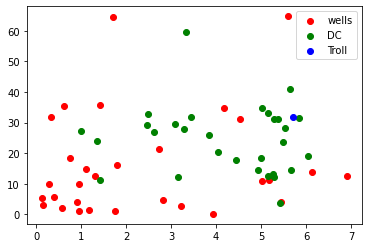

In [209]:
wells_x=[x for (x,y) in wells]
wells_y=[y for (x,y) in wells]
ds0_x=[x for (x,y) in ds0]
ds0_y=[y for (x,y) in ds0]
plt.scatter(wells_x,wells_y,c='red')
plt.scatter(ds0_x,ds0_y,c='green')
plt.scatter(pos_troll[0],pos_troll[1],c='blue')
plt.legend(['wells','DC','Troll'])

In [192]:
#cost function
def cost_f9(pos_ds):
    
    well_dist=0
    pipe_dist=0
    
    pos_ds=np.reshape(pos_ds, (-1, 2))
    
    for k1,k2 in zip(pos_ds,wells):
        well_dist+=math.sqrt((k1[0]-k2[0])**2+(k1[1]-k2[1])**2)
        pipe_dist+=math.sqrt((k1[0]-pos_troll[0])**2+(k1[1]-pos_troll[1])**2)
    
     
    well_cost=well_dist*p_well
    pipe_cost=pipe_dist*p_pipe
    cost=well_cost+pipe_cost
    return cost

In [193]:
#minimization
out=minimize(cost_f9,ds0)

Solution vizualization

<function matplotlib.pyplot.show(close=None, block=None)>

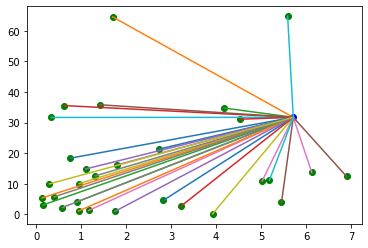

In [206]:
solution=np.reshape(out.x, (-1, 2))
solx=[x for (x,y) in solution]
soly=[y for (x,y) in solution]
plt.scatter(solx,soly,c='green')
plt.scatter(pos_troll[0],pos_troll[1],c='blue')
for i in range(len(solution)):
    plt.plot([pos_troll[0],solx[i]],[pos_troll[1],soly[i]])   
#plt.plot([pos_troll[0],out.x[0]],[pos_troll[1],out.x[1]])
plt.show